#Import titanic competitions

In [2]:
!kaggle competitions download -c titanic

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


#Install Lib

In [3]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

     ---------------------------------------- 11.0/11.0 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 15.5/15.5 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 3.2 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\f2py.exe' -> 'c:\\Python311\\Scripts\\f2py.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.5/7.5 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 470.9/470.9 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Python311\\share'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 293.3/293.3 kB 452.9 kB/s eta 0:00:00
  Using cached pandas-2.1.0-cp311-cp311-win_amd64.whl (11.0 MB)
  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl (7.5 MB)
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl (470 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#Import Lib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


#Read .csv using pandas

In [5]:
titanic_data = pd.read_csv('titanic/train.csv')
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
%pip install -U scikit-learn

     ---------------------------------------- 9.2/9.2 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]) :
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

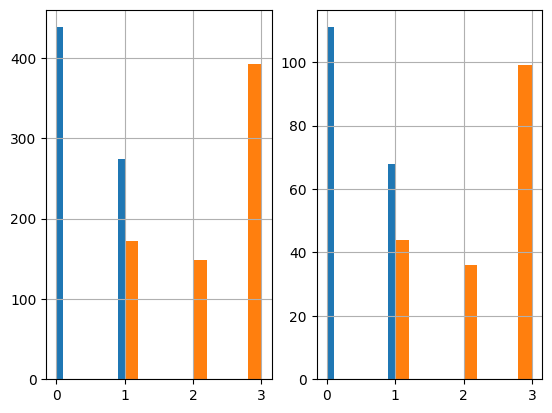

In [8]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 552 to 690
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None) :
        return self
    
    def transform(self, X) :
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [11]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin) :
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()

        column_names = ["C","S","Q","N"]


        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()

        column_names = ["Female", "Male"]

        for i in range(len(matrix.T)) :
            print(i)
            X[column_names[i]] = matrix.T[i]
            
        return X

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class FeatureDropper(BaseEstimator, TransformerMixin) :
    def fit(self, X, y=None):
        return self

    def transform(self, X) :
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [13]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("ageimputer", AgeImputer()), 
    ("featureencoder", FeatureEncoder()), 
    ("featuredropper", FeatureDropper() )
])

In [14]:
strat_train_set = pipeline.fit_transform(strat_train_set)

0
1


In [15]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 552 to 690
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [16]:
import seaborn as sns

def visualize_data(feature):
    plt.subplots(figsize = (10,10))
    ax=sns.countplot(x=feature,hue='Survived',data=strat_train_set)
    plt.title("Survived vs Non-Survived by "+feature, fontsize = 25)
    leg=ax.get_legend()
    leg.set_title('Survival')
    legs=leg.texts
    legs[0].set_text('No')
    legs[1].set_text("yes")  
    
#this function is used to print number of Survived passenger by a selective feature
def print_survived_data_by_feature(data,feature):    
    print('\n\nNumber of Survived passenger by '+feature+' :')
    print(data[data['Survived']==1][feature].groupby(strat_train_set[feature]).count())
    print('\n\nNumber of Death passenger by '+feature+' :')
    print(strat_train_set[data['Survived']==0][feature].groupby(data[feature]).count())    

In [17]:
print(strat_train_set['Survived'].value_counts())
survived = "{:.2f}".format(strat_train_set['Survived'].value_counts(normalize=True)[0]*100)

Survived
0    438
1    274
Name: count, dtype: int64




Number of Survived passenger by Pclass :
Pclass
1    109
2     70
3     95
Name: Pclass, dtype: int64


Number of Death passenger by Pclass :
Pclass
1     63
2     78
3    297
Name: Pclass, dtype: int64


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


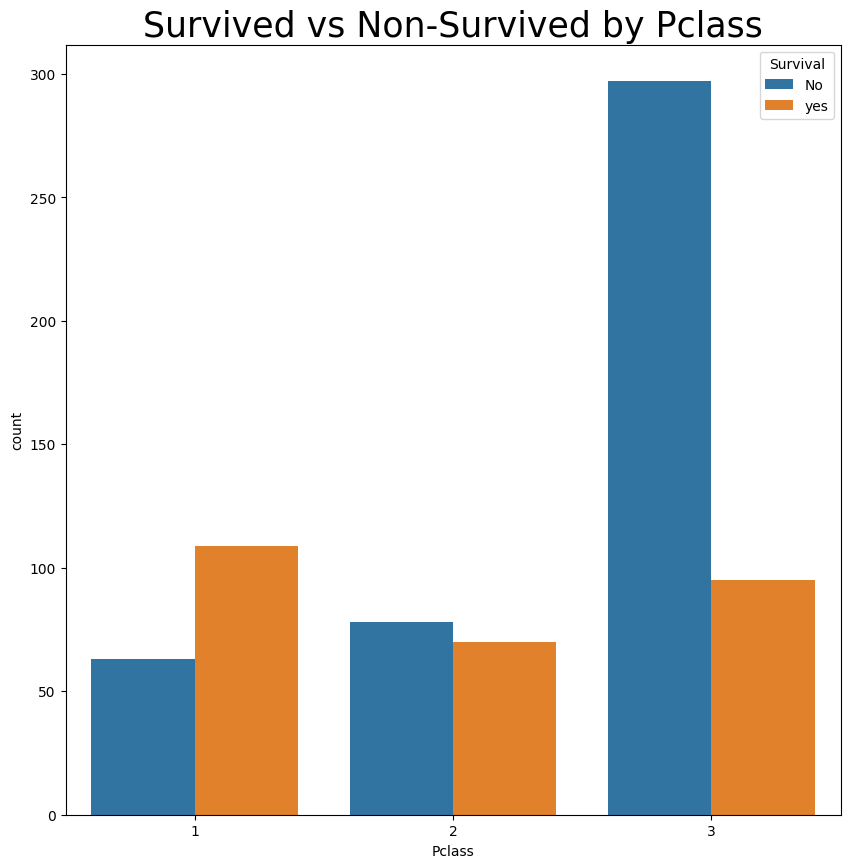

In [18]:
# Now check how many passengers (not)survived for each passenger's class
visualize_data('Pclass') 
print_survived_data_by_feature(strat_train_set,'Pclass')

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):




Number of Survived passenger by Male :
Male
0.0    186
1.0     88
Name: Male, dtype: int64


Number of Death passenger by Male :
Male
0.0     64
1.0    374
Name: Male, dtype: int64


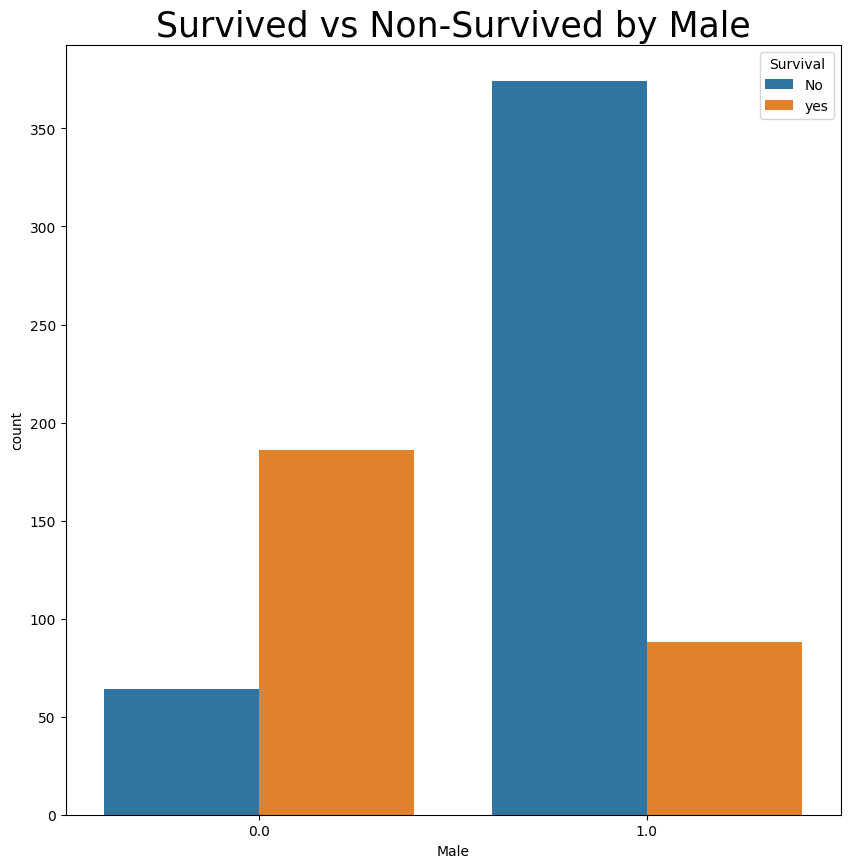

In [19]:
# Now check how many passengers (not)survived based on passenger's gender
visualize_data('Male')
print_survived_data_by_feature(strat_train_set,'Male')

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):




Number of Survived passenger by Female :
Female
0.0     88
1.0    186
Name: Female, dtype: int64


Number of Death passenger by Female :
Female
0.0    374
1.0     64
Name: Female, dtype: int64


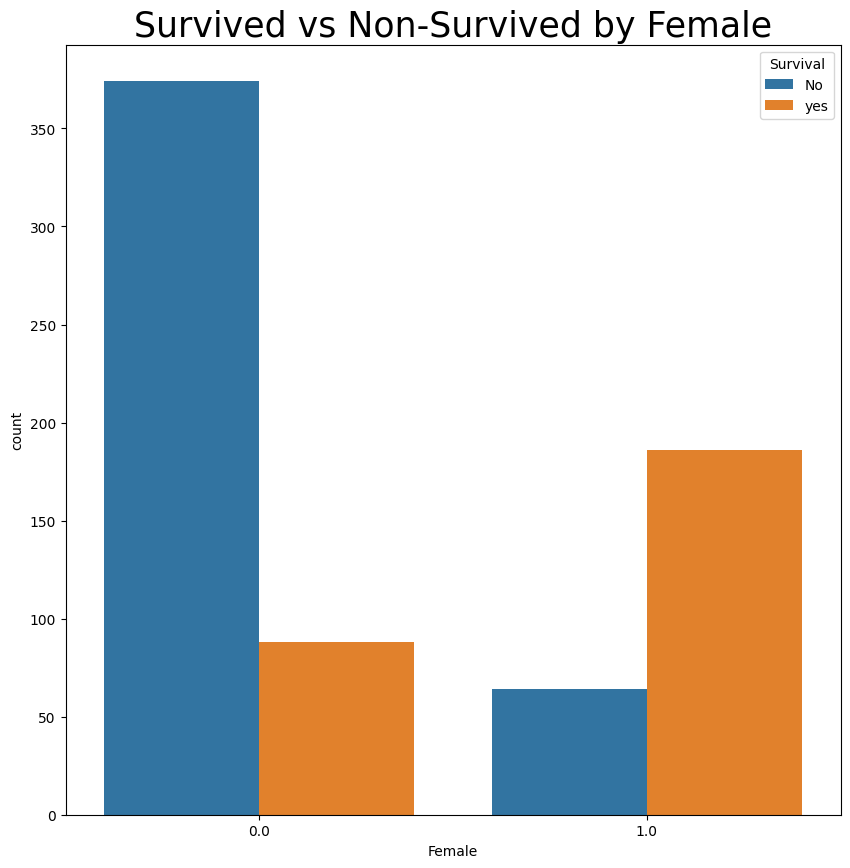

In [20]:
# Now check how many passengers (not)survived based on passenger's gender
visualize_data('Female')
print_survived_data_by_feature(strat_train_set,'Female')

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):




Number of Survived passenger by SibSp :
SibSp
0    162
1     97
2      9
3      3
4      3
Name: SibSp, dtype: int64


Number of Death passenger by SibSp :
SibSp
0    323
1     77
2     10
3      9
4     12
5      1
8      6
Name: SibSp, dtype: int64


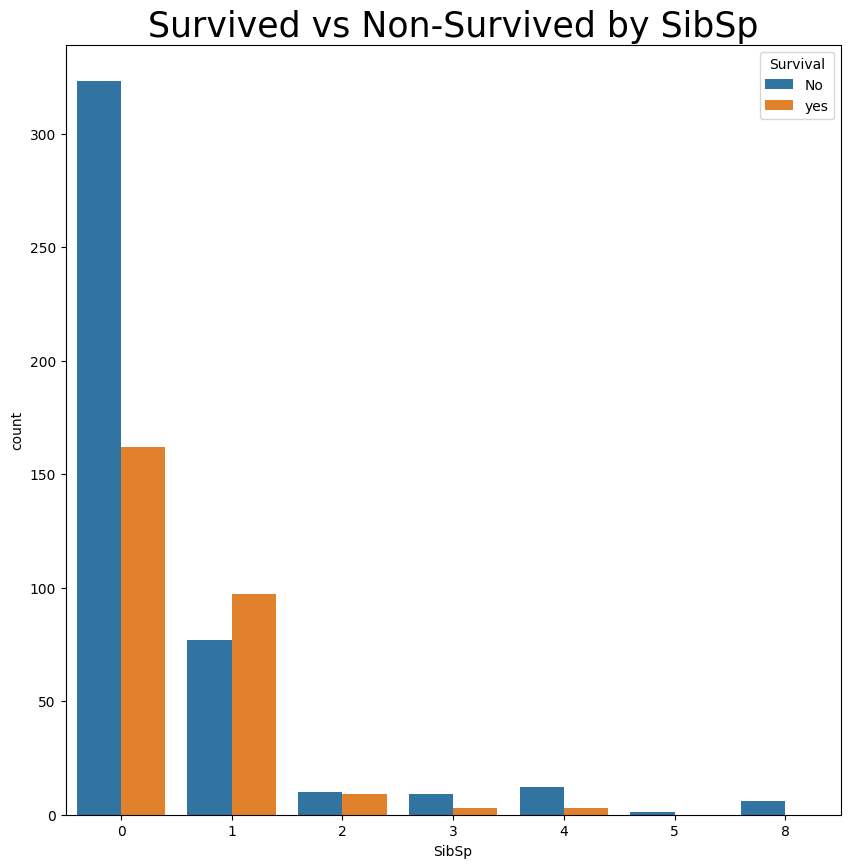

In [21]:
# Now check how many passengers (not)survived based on no of siblings/spouses the passenger had
visualize_data('SibSp')
print_survived_data_by_feature(strat_train_set,'SibSp')

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):




Number of Survived passenger by Parch :
Parch
0    183
1     56
2     31
3      3
5      1
Name: Parch, dtype: int64


Number of Death passenger by Parch :
Parch
0    358
1     40
2     30
3      2
4      3
5      4
6      1
Name: Parch, dtype: int64


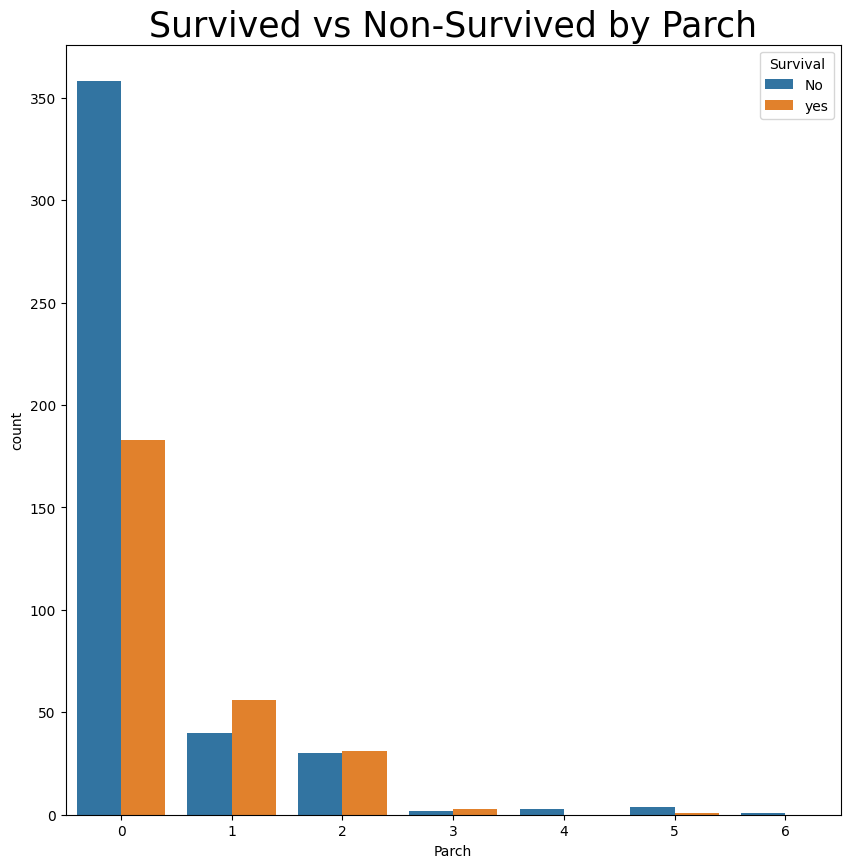

In [22]:
# Now, check how many passengers (not)survived based on number of parants/children the passenger had
visualize_data('Parch')
print_survived_data_by_feature(strat_train_set,'Parch')

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):




Number of Survived passenger by Q :
Q
0.0     98
1.0    176
Name: Q, dtype: int64


Number of Death passenger by Q :
Q
0.0     94
1.0    344
Name: Q, dtype: int64


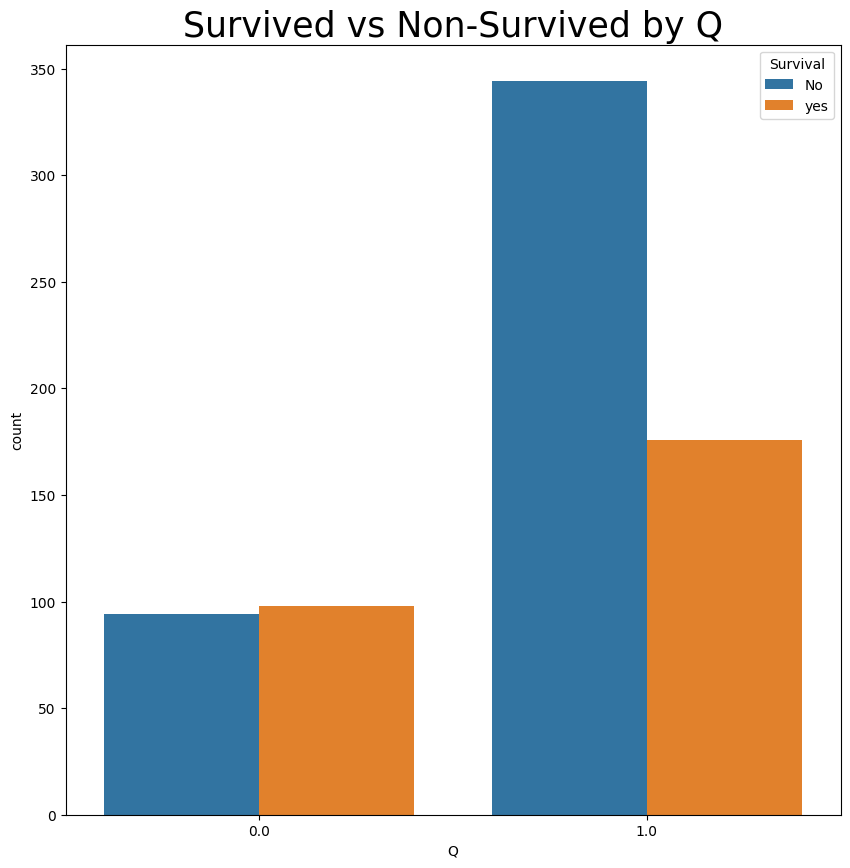

In [23]:
# Now, check how many passengers (not)survived based on embarked Port of the passenger
visualize_data('Q')
print_survived_data_by_feature(strat_train_set,'Q')

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):




Number of Survived passenger by C :
C
0.0    199
1.0     75
Name: C, dtype: int64


Number of Death passenger by C :
C
0.0    379
1.0     59
Name: C, dtype: int64


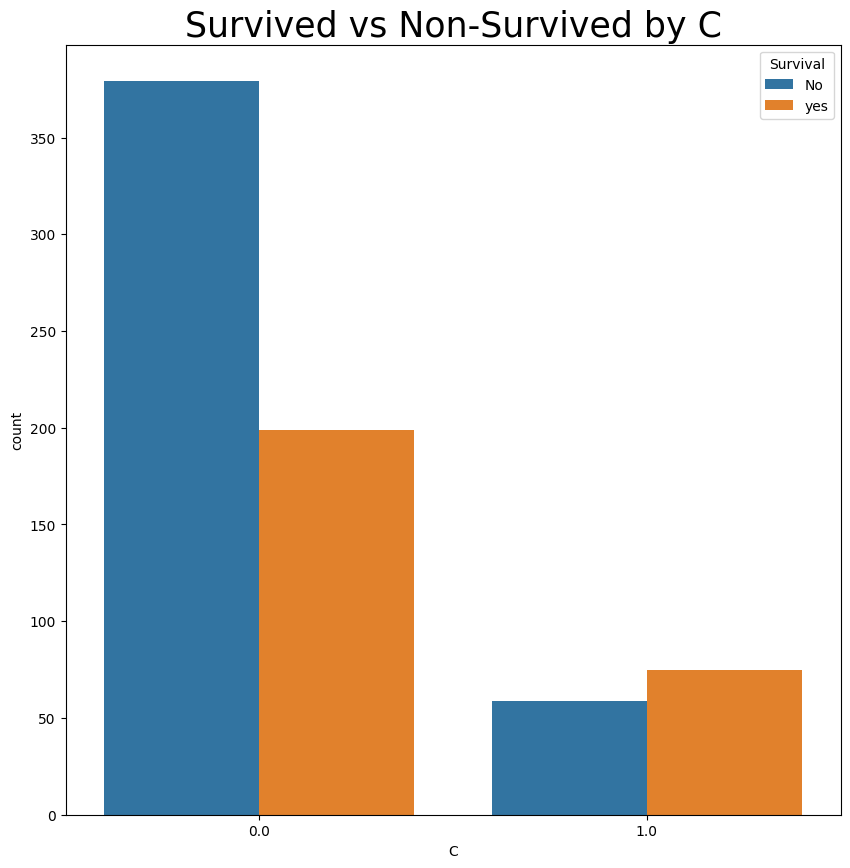

In [24]:
visualize_data('C')
print_survived_data_by_feature(strat_train_set,'C')

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):




Number of Survived passenger by S :
S
0.0    253
1.0     21
Name: S, dtype: int64


Number of Death passenger by S :
S
0.0    403
1.0     35
Name: S, dtype: int64


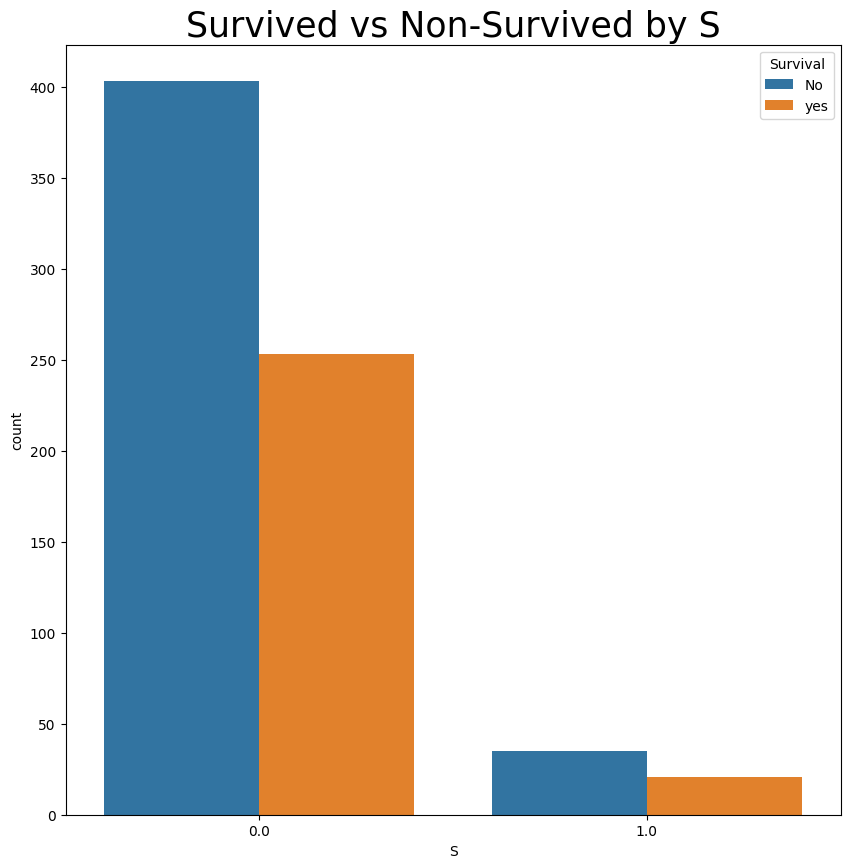

In [25]:
visualize_data('S')
print_survived_data_by_feature(strat_train_set,'S')

In [26]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
x_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [27]:
x_data

array([[ 3.79316429e-01,  8.27893418e-01, -2.66243636e-16, ...,
        -1.64570147e+00, -7.35612358e-01,  7.35612358e-01],
       [-1.43132511e+00,  8.27893418e-01, -6.05422898e-01, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       [ 7.43746401e-01, -1.56828591e+00,  1.94256843e+00, ...,
        -1.64570147e+00, -7.35612358e-01,  7.35612358e-01],
       ...,
       [-3.99412878e-01,  8.27893418e-01,  8.93395529e-01, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       [ 1.11201248e+00,  8.27893418e-01, -4.55541056e-01, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       [ 9.08698914e-01, -1.56828591e+00,  6.90453939e-02, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01]])

In [28]:
#prepare the data
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
all_features = strat_train_set.drop("Survived",axis=1)
target_feature = strat_train_set["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,target_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((498, 11), (214, 11), (498,), (214,))

In [29]:
# from sklearn.metrics import accuracy_score  #for accuracy_score

# # this fn is used to apply a model which will be passed as parameter and return the accuracy using that model
# def apply_model(model,xtrain,xtest,ytrain,ytest):
#     model.fit(xtrain,ytrain)
#     prediction=model.predict(xtest)
#     acc = round(accuracy_score(prediction,ytest)*100,2)
#     return acc

In [30]:
# # Apply logistic regression
# from sklearn.linear_model import LogisticRegression # Logistic Regression
# logireg_acc=apply_model(LogisticRegression(),X_train,X_test,y_train,y_test)
# print('The accuracy of the Logistic Regression is', logireg_acc)

In [31]:
# #Apply Decision Tree
# from sklearn.tree import DecisionTreeClassifier

# dtree_model= DecisionTreeClassifier(criterion='gini', 
#                              min_samples_split=10,min_samples_leaf=1)
# dtree_acc = apply_model(dtree_model,X_train,X_test,y_train,y_test)


# print('The accuracy of the DecisionTree Classifier is', dtree_acc)

In [32]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# # Create a LogisticRegression classifier
# logistic_clf = LogisticRegression()

# # Define the parameter grid for Logistic Regression
# logistic_param_grid = [
#     {"penalty": ['l1', 'l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100]}
# ]

# # Create a GridSearchCV object for Logistic Regression
# logistic_grid_search = GridSearchCV(logistic_clf, logistic_param_grid, cv=3, scoring="accuracy", return_train_score=True)

# # Fit the Logistic Regression model to your data
# logistic_grid_search.fit(x_data, y_data)

#Apply RandomForestClassifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth":[None, 5, 10], "min_samples_split":[2,3,4]}
]

grid_serach = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_serach.fit(x_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Machine", SVC()),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier())
]

# Loop through the classifiers and evaluate them using cross-validation
for name, classifier in classifiers:
    scores = cross_val_score(classifier, x_data, y_data, cv=3, scoring="accuracy")
    print(f"{name}:")
    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
    print("\n")


Logistic Regression:
Accuracy: 0.78 (+/- 0.03)


K-Nearest Neighbors:
Accuracy: 0.79 (+/- 0.02)


Support Vector Machine:
Accuracy: 0.81 (+/- 0.02)


Naive Bayes:
Accuracy: 0.79 (+/- 0.02)


Decision Tree:
Accuracy: 0.74 (+/- 0.02)


Random Forest:
Accuracy: 0.81 (+/- 0.03)




In [35]:
final_clf = grid_serach.best_estimator_
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200)

In [36]:
strat_test_set = pipeline.fit_transform(strat_test_set)


0
1


In [37]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [38]:
final_clf.score(X_data_test, y_data_test)

0.8156424581005587

In [39]:
final_data = pipeline.fit_transform(titanic_data)

0
1


In [40]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [41]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
x_data_final = scaler.fit_transform(X_final)
y_data_final = y.to_numpy()

In [42]:
print(y_data_final)

[0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0
 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 

In [43]:
final_clf = grid_serach.best_estimator_
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200)

In [44]:
titanic_test_data = pd.read_csv("titanic/test.csv")

In [45]:
final_test_data = pipeline.fit_transform(titanic_test_data)

0
1


In [46]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [47]:
from sklearn.preprocessing import StandardScaler

X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

C:\Users\Other\AppData\Local\Temp\ipykernel_740\3272941706.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method="ffill")


In [48]:
predistions = final_clf.predict(X_data_final_test)

In [49]:
predistions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predistions
final_df.to_csv("RandomForest_predictions.csv", index=False)

#Import pickle for export Model 

In [51]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(final_clf, file)

#Test Load For Work it

In [90]:
import pickle
loaded_model = pickle.load(open("model_01.pkl", "rb"))
loaded_model

RandomForestClassifier(n_estimators=200)

#Survived Result 

In [100]:
import numpy as np

#  0   PassengerId  418 non-null    int64  
#  1   Pclass       418 non-null    int64  
#  2   Age          418 non-null    float64
#  3   SibSp        418 non-null    int64  
#  4   Parch        418 non-null    int64  
#  5   Fare         417 non-null    float64
#  6   C            418 non-null    float64
#  7   S            418 non-null    float64
#  8   Q            418 non-null    float64
#  9   Female       418 non-null    float64
#  10  Male         418 non-null    float64

# 904,1,23,1,0,82.2667, 0,1,0,1,0]
data = [892 ,3 ,34 ,0 ,0 ,7 ,1 ,0 ,1 ,1,0]  # Use a Python list
input_data = np.array(data)

print(input_data)

prediction = loaded_model.predict([input_data])
result = prediction[0]
print(prediction)
if result==0 :
    print('die')
else : print('Survived')

[892   3  34   0   0   7   1   0   1   1   0]
[0]
die
